# Explorative Data Analysis

### Setup

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load Data
train = pd.read_csv('../data/train.csv')

print(f"Train shape: {train.shape}")

Train shape: (1460, 81)


### NA Values 

Features with NAs: 19
              Count  Percentage
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
MasVnrType      872   59.726027
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageQual       81    5.547945
GarageFinish     81    5.547945
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageCond       81    5.547945
BsmtFinType2     38    2.602740
BsmtExposure     38    2.602740
BsmtCond         37    2.534247
BsmtQual         37    2.534247
BsmtFinType1     37    2.534247
MasVnrArea        8    0.547945
Electrical        1    0.068493


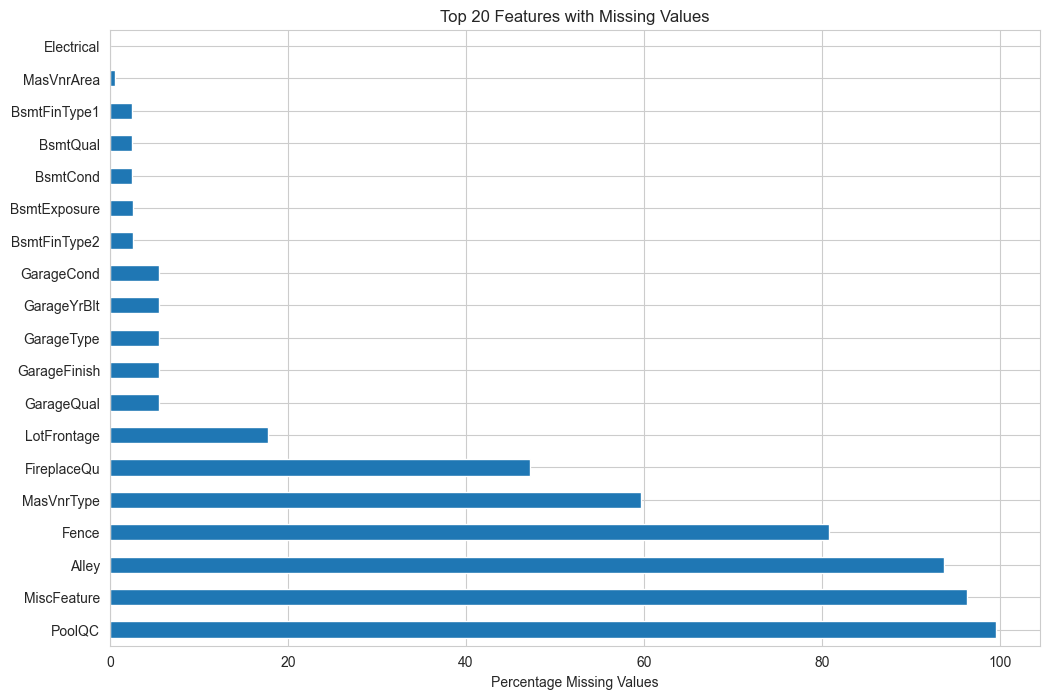

In [10]:
# Missing Values
missing = train.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(train) * 100)

missing_df = pd.DataFrame({
    'Count': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
})

print(f"Features with NAs: {len(missing_df)}")
print(missing_df.head(20))

# Visualisation
plt.figure(figsize=(12, 8))
missing_df['Percentage'].head(20).plot(kind='barh')
plt.xlabel('Percentage Missing Values')
plt.title('Top 20 Features with Missing Values')
plt.show()

### Analysing Target Variable (SalePrice)

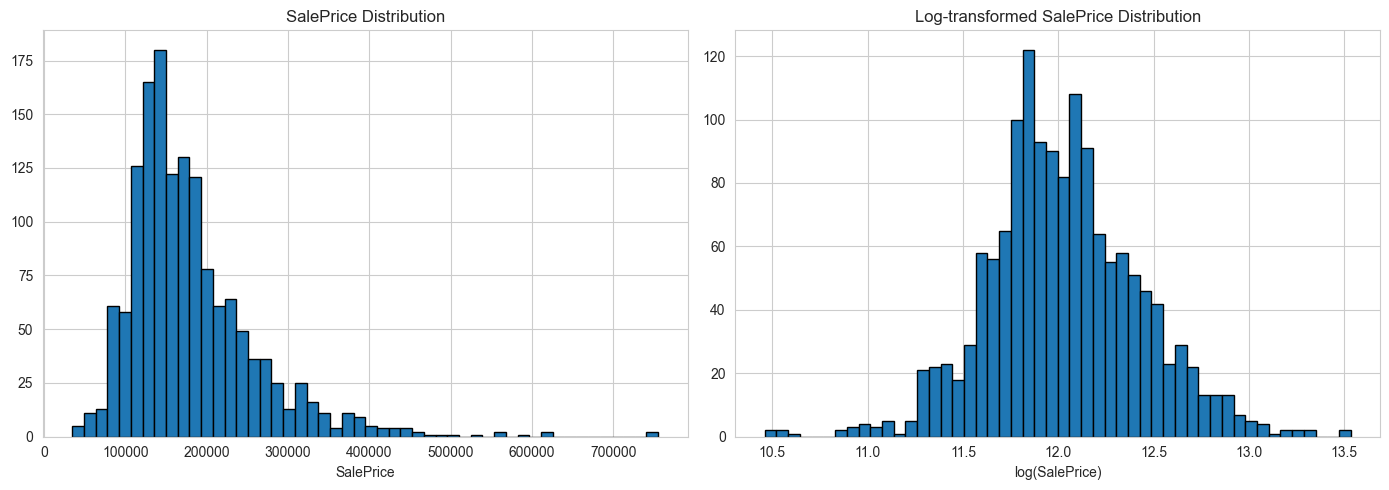

SalePrice Stats:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.88
Kurtosis: 6.54


In [11]:
# SalePrice Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train['SalePrice'], bins=50, edgecolor='black')
axes[0].set_xlabel('SalePrice')
axes[0].set_title('SalePrice Distribution')

# Log-transformed
axes[1].hist(np.log1p(train['SalePrice']), bins=50, edgecolor='black')
axes[1].set_xlabel('log(SalePrice)')
axes[1].set_title('Log-transformed SalePrice Distribution')

plt.tight_layout()
plt.show()

print("SalePrice Stats:")
print(train['SalePrice'].describe())
print(f"\nSkewness: {train['SalePrice'].skew():.2f}")
print(f"Kurtosis: {train['SalePrice'].kurtosis():.2f}")

## Outlier Detection

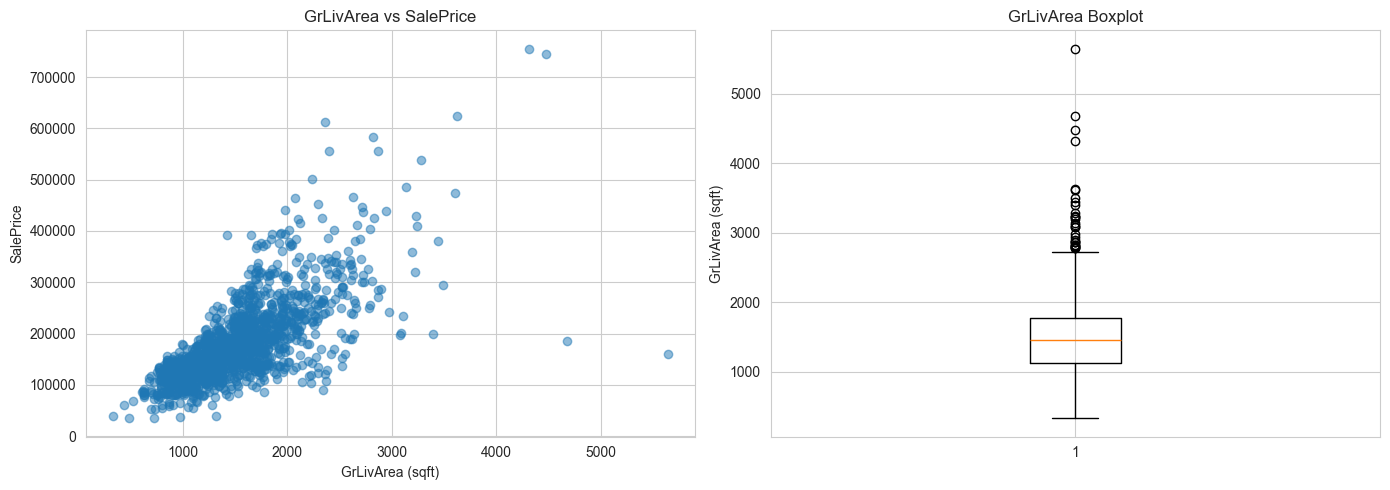

Houses with GrLivArea > 4000 and niedrigem Preis:
        Id  GrLivArea  SalePrice
523    524       4676     184750
1298  1299       5642     160000


In [12]:
# Outlier in GrLivArea (Frequent problem in the dataset)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5)
axes[0].set_xlabel('GrLivArea (sqft)')
axes[0].set_ylabel('SalePrice')
axes[0].set_title('GrLivArea vs SalePrice')

# Boxplot
axes[1].boxplot(train['GrLivArea'])
axes[1].set_ylabel('GrLivArea (sqft)')
axes[1].set_title('GrLivArea Boxplot')

plt.tight_layout()
plt.show()

# Identification of extreme outliers
print("Houses with GrLivArea > 4000 and niedrigem Preis:")
outliers = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]
print(outliers[['Id', 'GrLivArea', 'SalePrice']])